<a href="https://colab.research.google.com/github/TruongVuGoBrrrrr/BaiTapAI20104074/blob/BTVN-NhanDien/NhanDienTien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [26]:
train_image = '/content/drive/MyDrive/Data Train/Tien Viet/Train'
valid_image = '/content/drive/MyDrive/Data Train/Tien Viet/Val'

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_datagen.flow_from_directory(train_image,target_size=(200,200),class_mode='categorical')
validation_set = validation_datagen.flow_from_directory(valid_image,target_size=(200,200),class_mode='categorical')

Found 768 images belonging to 9 classes.
Found 95 images belonging to 9 classes.


In [28]:
x_train,y_train=next(train_set)

In [29]:
x_train.shape

(32, 200, 200, 3)

In [30]:
y_train.shape

(32, 9)

In [31]:
label=['100k','10k','1k','200k','20k','2k','500k','50k','5k']

In [33]:
from keras.models import Sequential, Model 
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models
from keras.layers import Conv2D, MaxPooling2D

In [34]:
mod = models.Sequential()
mod.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))

In [35]:
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Flatten())
mod.add(Dense(128,activation='relu'))
mod.add(Dense(9,activation='softmax'))

In [36]:
mod.compile(optimizer='Adam',loss = "categorical_crossentropy", metrics=["accuracy"])

In [37]:
history=mod.fit(train_set,epochs=20,batch_size=128,verbose=1, validation_data=validation_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/20
24/24 [==============================] - 95s 4s/step - loss: 2.5616 - accuracy: 0.1211 - val_loss: 2.2157 - val_accuracy: 0.0947
Epoch 2/20
24/24 [==============================] - 78s 3s/step - loss: 2.1833 - accuracy: 0.1419 - val_loss: 2.2032 - val_accuracy: 0.1474
Epoch 3/20
24/24 [==============================] - 80s 3s/step - loss: 2.1477 - accuracy: 0.1771 - val_loss: 2.1896 - val_accuracy: 0.1158
Epoch 4/20
24/24 [==============================] - 78s 3s/step - loss: 2.0111 - accuracy: 0.2331 - val_loss: 2.1843 - val_accuracy: 0.1474
Epoch 5/20
24/24 [==============================] - 79s 3s/step - loss: 1.8795 - accuracy: 0.2904 - val_loss: 2.2056 - val_accuracy: 0.2105
Epoch 6/20
24/24 [==============================] - 79s 3s/step - loss: 1.6942 - accuracy: 0.3815 - val_loss: 2.0034 - val_accuracy: 0.2421
Epoch 7/20
24/24 [==============================] - 77s 3s/step - loss: 1.5185 - accuracy: 0.4362 - val_loss: 2.1418 - val_accuracy: 0.2842
Epoch 8/20
24/24 [==

In [38]:
mod.save('NhandienTienViet.h5')

In [39]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import numpy as np
from keras.models import load_model
from matplotlib import pyplot as plt

1/1 [==============================] - 0s 50ms/step
[[9.9918407e-01 1.8031243e-07 7.7562139e-04 9.6715048e-08 3.2798227e-05
  3.2431718e-08 7.1390923e-06 1.1168338e-09 1.3528474e-08]]
1/1 [==============================] - 0s 50ms/step
Đây là: 100k


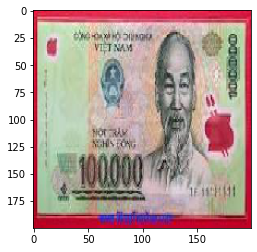

In [44]:
url='/content/images.jpg'
img=load_img(url,target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:",label[a])

1/1 [==============================] - 0s 49ms/step
[[2.8732923e-06 1.4185710e-04 1.4630787e-01 1.2961972e-05 6.4877953e-05
  8.4859812e-01 1.2753224e-04 1.3060352e-06 4.7425795e-03]]
1/1 [==============================] - 0s 42ms/step
Đây là: 2k


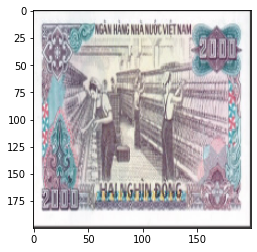

In [45]:
url='/content/Giấy_bạc_2000_đồng.jpg'
img=load_img(url,target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:",label[a])